## Clustering Wholesale Customer Data using K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Github\Datasets\wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#the objective is to find hidden pattern
#build model based on 2 features
df2 = df[['Fresh','Milk']]
#on the right approach we should conduct feature scaling in clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3,random_state=5)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [9]:
model.cluster_centers_

array([[ 5062.5177305 ,  5973.4964539 ],
       [44622.5625    , 12838.09375   ],
       [19242.69047619,  3611.20634921]])

- 0th cluster: lowest Fresh, moderate Milk
- 1st cluster: highest Fresh, highest Milk
- 2nd cluster: moderate Fresh, lowest Milk 

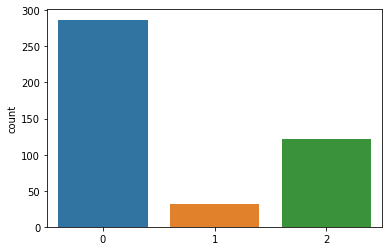

In [10]:
#check for cluster size
sns.countplot(model.labels_)
plt.show()

#if you buy fresh product i will give you discount on milk

In [11]:
df3 = df[['Fresh','Milk','Grocery','Frozen']]

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df3)

In [15]:
model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [16]:
model2.cluster_centers_

array([[ 1.77210038, -0.04452883, -0.26515809,  1.46300038],
       [-0.28051843,  1.92743279,  2.18506114, -0.18642898],
       [-0.23783822, -0.24037031, -0.23932744, -0.2021462 ]])

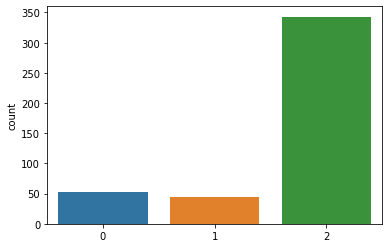

In [17]:
sns.countplot(model2.labels_)
plt.show()

## Elbow Method to choose value of k
In clustering, error(cost function) is called inertia, which means the distance among observations in the clusters. These distance (inertia) will be decreased along with increasing of k value. 

In [19]:
k = []
inertia =[]

for i in range(1,20):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df2)
    inertia.append(model.inertia_)
    k.append(i)

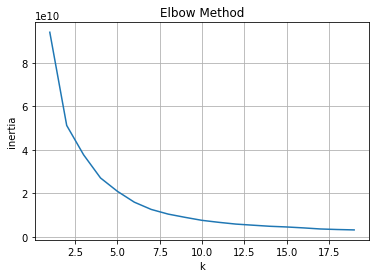

In [20]:
plt.plot(k,inertia)
plt.grid('on')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()